# Spectra of Buoyancy Data #

Shown here is an IPython notebook which conducts spectral and structure-function analysis on the Eady and Phillips model buoyancy data provided by Professor Shane Keating.

In [8]:
import numpy as np
import os
from matplotlib import pyplot as plt
%matplotlib inline
from Idealized_Model import idealmodel
reload(idealmodel)

<module 'Idealized_Model.idealmodel' from 'Idealized_Model/idealmodel.py'>

# Eady Model #

In [10]:
# load data files
base_dir = '../../../data/scratch/takaya/Shane/Eady/data/'

nday = 25
index = 0
while nday < 65:
    if nday % 5 == 0:
        fname = os.path.join(base_dir, 
                         'b%02d.mat' % (nday))
        print fname
        #if os.path.exists(fname) == True:
        try:
            p = idealmodel.IDEALFile(fname)
            nbins, Nx, Ny, k, l, spac2_2d, tilde2_2d, breve2_2d, Ki, iso_spec, area = p.power_spectrum_2d()   # Calculates all the variables necessary for an isotropic spectra
            if index == 0:
                spac2_sum = np.zeros((Ny, Nx))
                tilde2_sum = np.zeros((Ny, Nx))
                breve2_sum = np.zeros((Ny, Nx))
                isospec_sum = np.zeros(nbins)
            spac2_sum += spac2_2d
            tilde2_sum += tilde2_2d
            breve2_sum += breve2_2d
            isospec_sum += iso_spec
            index += 1
        #else:
        except: 
            if os.path.exists(fname) == False:
                print 'error'
        print index, nday
    nday += 1
    
Nt = index

../../../data/scratch/takaya/Shane/Eady/data/b25.mat
1 25
../../../data/scratch/takaya/Shane/Eady/data/b30.mat
2 30
../../../data/scratch/takaya/Shane/Eady/data/b35.mat
3 35
../../../data/scratch/takaya/Shane/Eady/data/b40.mat
4 40
../../../data/scratch/takaya/Shane/Eady/data/b45.mat
5 45
../../../data/scratch/takaya/Shane/Eady/data/b50.mat
5 50
../../../data/scratch/takaya/Shane/Eady/data/b55.mat
error
5 55
../../../data/scratch/takaya/Shane/Eady/data/b60.mat
6 60


(array([  1.00000000e-24,   1.00000000e-21,   1.00000000e-18,
          1.00000000e-15,   1.00000000e-12,   1.00000000e-09,
          1.00000000e-06,   1.00000000e-03,   1.00000000e+00,
          1.00000000e+03,   1.00000000e+06,   1.00000000e+09,
          1.00000000e+12,   1.00000000e+15]),
 <a list of 14 Text yticklabel objects>)

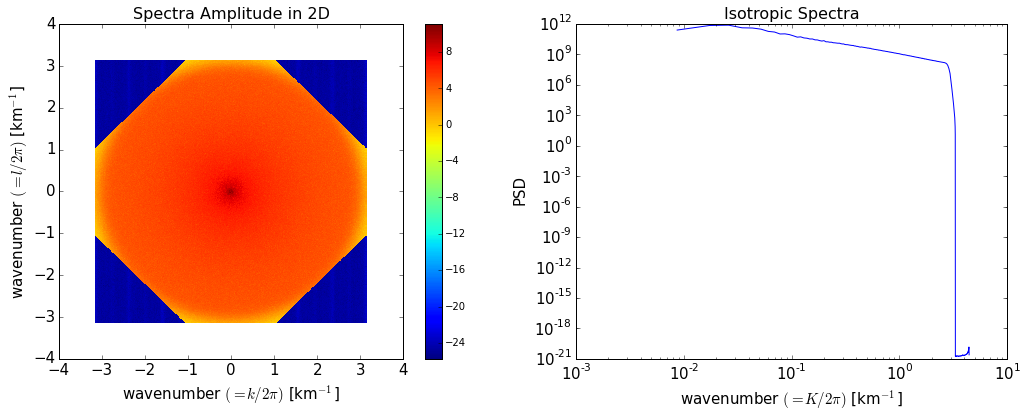

In [11]:
plt.figure(figsize=(17,6))
plt.subplot(121)
plt.pcolormesh(k*1e3, l*1e3, np.ma.masked_invalid(np.log10(breve2_sum/Nt)))
plt.colorbar()
plt.title('Spectra Amplitude in 2D', fontsize=16)
plt.xlabel('wavenumber $(=k/2\pi)$ [km$^{-1}$]', fontsize=15)
plt.ylabel('wavenumber $(=l/2\pi)$ [km$^{-1}$]', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.subplot(122)
plt.loglog(Ki*1e3, isospec_sum/Nt)
plt.title('Isotropic Spectra', fontsize=16)
plt.xlabel('wavenumber $(=K/2\pi)$ [km$^{-1}$]', fontsize=15)
plt.ylabel('PSD', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

In [12]:
# load data files
base_dir = '../../../data/scratch/takaya/Shane/Eady/data/'

nday = 25
index = 0
while nday < 65:
    if nday % 5 == 0:
        fname = os.path.join(base_dir, 
                         'b%02d.mat' % (nday))
        print fname
        try:
            p = idealmodel.IDEALFile(fname)
            nbins, Nx, Ny, k, l, grad_spac2_2d, grad_tilde2_2d, grad_breve2_2d, Ki, grad_iso_spec, area = p.power_spectrum_2d(grad=True)   # Calculates all the variables necessary for an isotropic spectra
            if index == 0:
                grad_spac2_sum = np.zeros((Ny, Nx))
                grad_tilde2_sum = np.zeros((Ny, Nx))
                grad_breve2_sum = np.zeros((Ny, Nx))
                grad_isospec_sum = np.zeros(nbins)
            grad_spac2_sum += grad_spac2_2d
            grad_tilde2_sum += grad_tilde2_2d
            grad_breve2_sum += grad_breve2_2d
            grad_isospec_sum += grad_iso_spec
            index += 1
        except: 
            if os.path.exists(fname) == False:
                print 'error'
        print index, nday
    nday += 1
    
Nt = index

../../../data/scratch/takaya/Shane/Eady/data/b25.mat
1 25
../../../data/scratch/takaya/Shane/Eady/data/b30.mat
2 30
../../../data/scratch/takaya/Shane/Eady/data/b35.mat
3 35
../../../data/scratch/takaya/Shane/Eady/data/b40.mat
4 40
../../../data/scratch/takaya/Shane/Eady/data/b45.mat
5 45
../../../data/scratch/takaya/Shane/Eady/data/b50.mat
5 50
../../../data/scratch/takaya/Shane/Eady/data/b55.mat
error
5 55
../../../data/scratch/takaya/Shane/Eady/data/b60.mat
6 60


(array([ -200.,     0.,   200.,   400.,   600.,   800.,  1000.,  1200.]),
 <a list of 8 Text yticklabel objects>)

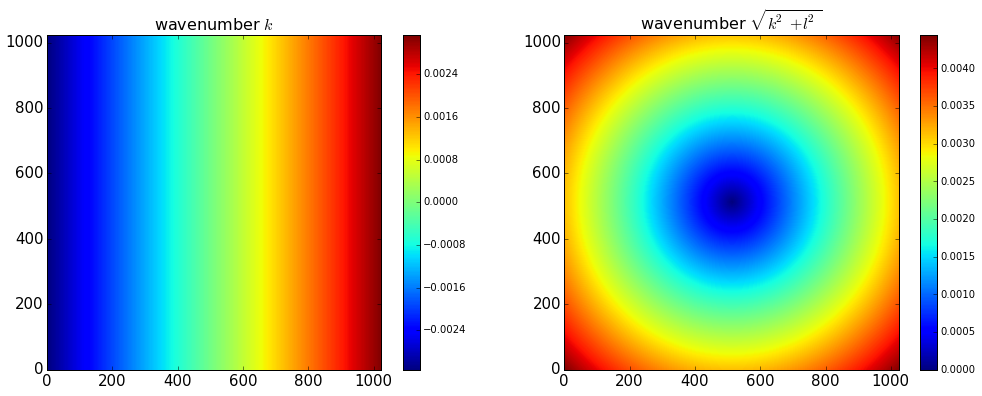

In [13]:
kk,ll = np.meshgrid(k,l)

plt.figure(figsize=(17,6))
plt.subplot(121)
plt.imshow(kk, origin='bottom')
plt.colorbar()
plt.title('wavenumber $k$', fontsize=16)
#plt.xlabel('wavenumber $(=k/2\pi)$', fontsize=15)
#plt.ylabel('wavenumber $(=l/2\pi)$', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.subplot(122)
plt.imshow(np.sqrt(kk**2+ll**2), origin='bottom')
plt.colorbar()
plt.title('wavenumber $\sqrt{k^2+l^2}$', fontsize=16)
#plt.xlabel('wavenumber $(=k/2\pi)$', fontsize=15)
#plt.ylabel('wavenumber $(=l/2\pi)$', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

Defining 

$$ F \equiv \mathscr{F}(b),\ \ \ G \equiv \mathscr{F}\Big(\frac{\partial b}{\partial x}\Big) $$

and assuming a plane wave solution for $b$, the following should hold

$$ |G|^2 = k^2|F|^2 $$

This comes from

$$ \frac{\partial}{\partial x}\frac{1}{(2\pi)^2}\iint\hat{b}(k,l) e^{i(kx+ly)}\ dkdl = \frac{\partial b}{\partial x} = \frac{1}{(2\pi)^2}\iint\mathscr{F}\Big(\frac{\partial b}{\partial x}\Big) e^{i(kx+ly)}\ dkdl $$

-c:3: RuntimeWarning: divide by zero encountered in log10


(array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.]),
 <a list of 9 Text yticklabel objects>)

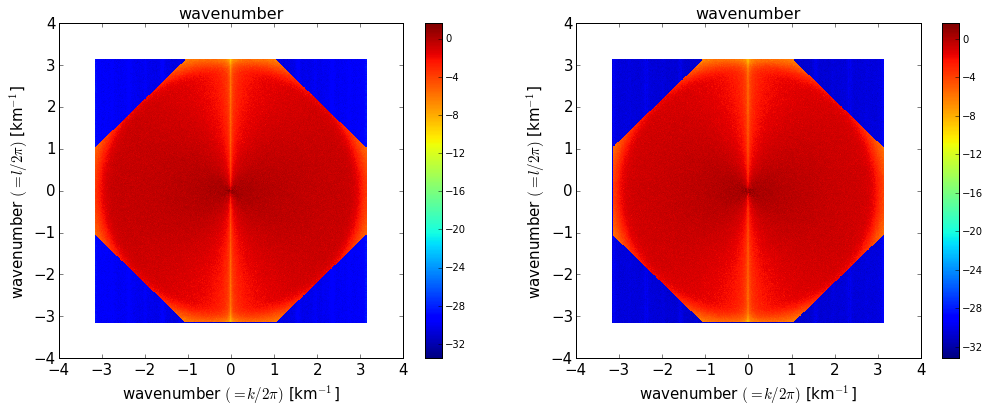

In [14]:
plt.figure(figsize=(17,6))
plt.subplot(121)
plt.pcolormesh(k*1e3,l*1e3,np.ma.masked_invalid(np.log10(kk**2*breve2_sum/Nt)))
plt.colorbar()
plt.title('wavenumber', fontsize=16)
plt.xlabel('wavenumber $(=k/2\pi)$ [km$^{-1}$]', fontsize=15)
plt.ylabel('wavenumber $(=l/2\pi)$ [km$^{-1}$]', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.clim([np.log10(kk**2*breve2_sum/Nt).min(),np.log10(kk**2*breve2_sum/Nt).max()])
plt.subplot(122)
plt.pcolormesh(k*1e3,l*1e3,np.ma.masked_invalid(np.log10(grad_breve2_sum/Nt)))
plt.colorbar()
plt.title('wavenumber', fontsize=16)
plt.xlabel('wavenumber $(=k/2\pi)$ [km$^{-1}$]', fontsize=15)
plt.ylabel('wavenumber $(=l/2\pi)$ [km$^{-1}$]', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.clim([np.log10(grad_breve2_sum/Nt).min(),np.log10(grad_breve2_sum/Nt).max()])

In [15]:
print (kk**2*breve2_sum).sum()/grad_breve2_sum.sum()
print ((kk**2*breve2_sum).sum()/grad_breve2_sum.sum())**-1
#(2*np.pi)**-2
#print (kk**2*breve2_sum*3e1).sum()/grad_breve2_sum.sum()

1.17426333413
0.851597738711


0.025330295910584444

In [40]:
#print spac2_sum.sum()/grad_spac2_sum.sum()

34531024.6594


## Fitting a Slope to the Isotropic Spectra ##

In [43]:
def fit_loglog(x, y):
    # fig log vs log
    p = np.polyfit(np.log2(x), np.log2(y), 1)
    y_fit = 2**(np.log2(x)*p[0] + p[1])
    #A = np.vstack([np.log2(x), np.ones(len(x))]).T
    #a, b = np.linalg.lstsq(A, np.log2(y))[0]
    #y_fit = 2**(np.log2(x)*a + b)
    
    return y_fit, p[0]

In [44]:
Ns = 20
Ne = 180
isospec_sum_e = isospec_sum/Nt
#A = np.vstack([np.log10(Ki[Ns:Ne]), np.ones(len(Ki[Ns:Ne]))]).T
#m_e, c = np.linalg.lstsq(A, np.log10(isospec_sum_e[Ns:Ne]))[0]
ps_fit_e, ps_slope_e = fit_loglog(Ki[Ns:Ne], isospec_sum_e[Ns:Ne])

print ps_slope_e  # slope and intercept

-1.87647389675


(array([  1.00000000e-24,   1.00000000e-21,   1.00000000e-18,
          1.00000000e-15,   1.00000000e-12,   1.00000000e-09,
          1.00000000e-06,   1.00000000e-03,   1.00000000e+00,
          1.00000000e+03,   1.00000000e+06,   1.00000000e+09,
          1.00000000e+12,   1.00000000e+15]),
 <a list of 14 Text yticklabel objects>)

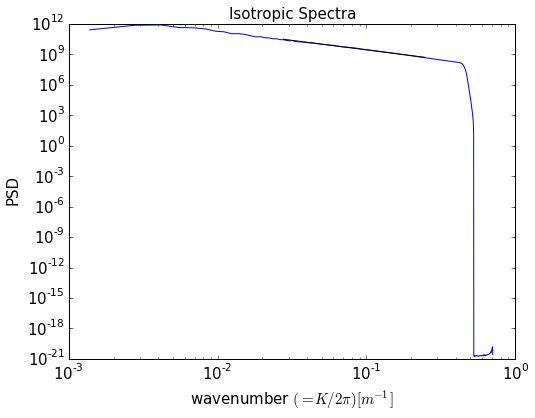

In [45]:
plt.figure(figsize=(8,6))
blue, = plt.loglog(Ki, isospec_sum_e, basex=10, basey=10)
black = plt.loglog(Ki[Ns:Ne], ps_fit_e, 'k')
plt.title('Isotropic Spectra', fontsize=15)
plt.xlabel('wavenumber $(=K/2\pi) [m^{-1}]$', fontsize=15)
plt.ylabel('PSD', fontsize=15)
#plt.ylim([1e-30, 1e4])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Phillips Model #

In [46]:
# load data files
base_dir = '../../../data/scratch/takaya/Shane/Phillips/'

nday = 25
index = 0
while nday < 65:
    if nday % 5 == 0:
        fname = os.path.join(base_dir, 
                         'b%02d.mat' % (nday))
        print fname
        try:
            p = idealmodel.IDEALFile(fname)
            nbins, Nx, Ny, k, l, PSD_2d, Ki, iso_spec, area = p.power_spectrum_2d(varname='bC')   # Calculates all the variables necessary for an isotropic spectra
            if index == 0:
                PSD_sum = np.zeros((Ny, Nx))
                isospec_sum = np.zeros(nbins)
            PSD_sum += PSD_2d
            isospec_sum += iso_spec
            index += 1
        except: 
            if os.path.exists(fname) == False:
                print 'error'
        print index, nday
    nday += 1
    
Nt = index

../../../data/scratch/takaya/Shane/Phillips/b25.mat
1 25
../../../data/scratch/takaya/Shane/Phillips/b30.mat
2 30
../../../data/scratch/takaya/Shane/Phillips/b35.mat
3 35
../../../data/scratch/takaya/Shane/Phillips/b40.mat
4 40
../../../data/scratch/takaya/Shane/Phillips/b45.mat
5 45
../../../data/scratch/takaya/Shane/Phillips/b50.mat
6 50
../../../data/scratch/takaya/Shane/Phillips/b55.mat
7 55
../../../data/scratch/takaya/Shane/Phillips/b60.mat
8 60


(array([  1.00000000e-27,   1.00000000e-24,   1.00000000e-21,
          1.00000000e-18,   1.00000000e-15,   1.00000000e-12,
          1.00000000e-09,   1.00000000e-06,   1.00000000e-03,
          1.00000000e+00,   1.00000000e+03,   1.00000000e+06,
          1.00000000e+09,   1.00000000e+12,   1.00000000e+15]),
 <a list of 15 Text yticklabel objects>)

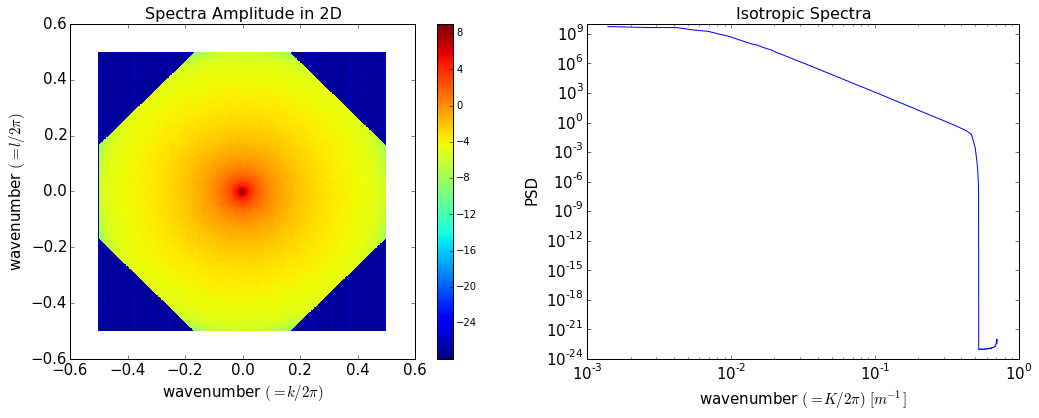

In [47]:
plt.figure(figsize=(17,6))
plt.subplot(121)
plt.pcolormesh(k, l, np.ma.masked_invalid(np.log10(PSD_sum/Nt)))
plt.colorbar()
plt.title('Spectra Amplitude in 2D', fontsize=16)
plt.xlabel('wavenumber $(=k/2\pi)$', fontsize=15)
plt.ylabel('wavenumber $(=l/2\pi)$', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.subplot(122)
plt.loglog(Ki, isospec_sum/Nt)
plt.title('Isotropic Spectra', fontsize=16)
plt.xlabel('wavenumber $(=K/2\pi)\ [m^{-1}]$', fontsize=15)
plt.ylabel('PSD', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

## Fitting a Slope to the Isotropic Spectra ##

In [48]:
isospec_sum_p = isospec_sum/Nt
#A = np.vstack([np.log10(Ki[Ns:Ne]), np.ones(len(Ki[Ns:Ne]))]).T
#m_p, c = np.linalg.lstsq(A, np.log10(isospec_sum_p[Ns:Ne]))[0]
ps_fit_p, ps_slope_p = fit_loglog(Ki[Ns:Ne], isospec_sum_p[Ns:Ne])

print ps_slope_p  # slope and intercept

-5.99785300965


(array([  1.00000000e-29,   1.00000000e-26,   1.00000000e-23,
          1.00000000e-20,   1.00000000e-17,   1.00000000e-14,
          1.00000000e-11,   1.00000000e-08,   1.00000000e-05,
          1.00000000e-02,   1.00000000e+01,   1.00000000e+04,
          1.00000000e+07,   1.00000000e+10,   1.00000000e+13]),
 <a list of 15 Text yticklabel objects>)

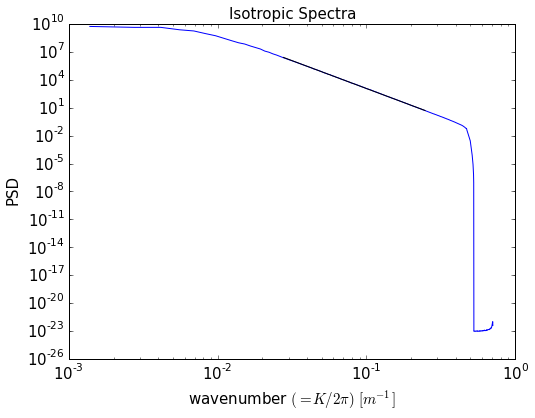

In [49]:
plt.figure(figsize=(8,6))
blue, = plt.loglog(Ki, isospec_sum_p, basex=10, basey=10)
black = plt.loglog(Ki[Ns:Ne], ps_fit_p, 'k')
plt.title('Isotropic Spectra', fontsize=15)
plt.xlabel('wavenumber $(=K/2\pi)\ [m^{-1}]$', fontsize=15)
plt.ylabel('PSD', fontsize=15)
plt.ylim([1e-26, 1e10])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Compare the Buoyance Spectra with Results of Keating et al. (2011) #
## Shane's Kinetic Spectra ##

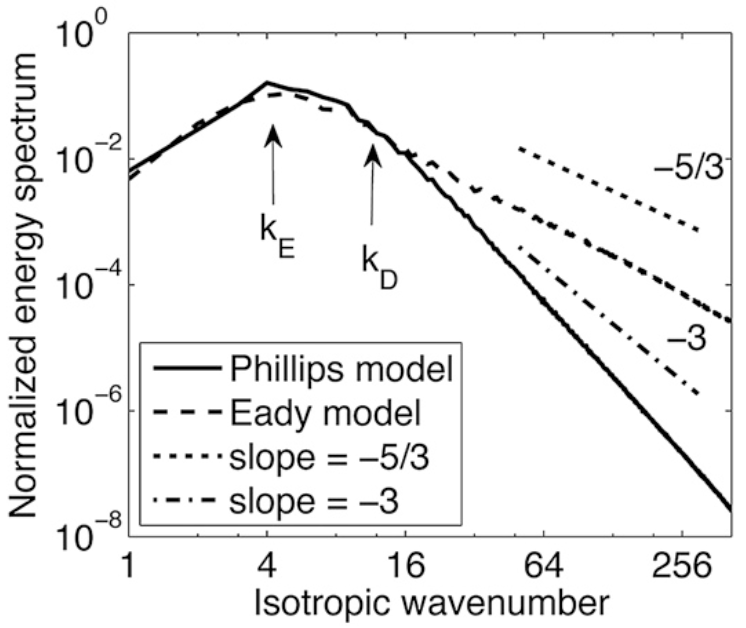

In [23]:
from IPython.display import Image
Image(filename='Idealized_Model/Energy_Spectrum_Shane.png')

## Shane's Buoyancy Spectra ##

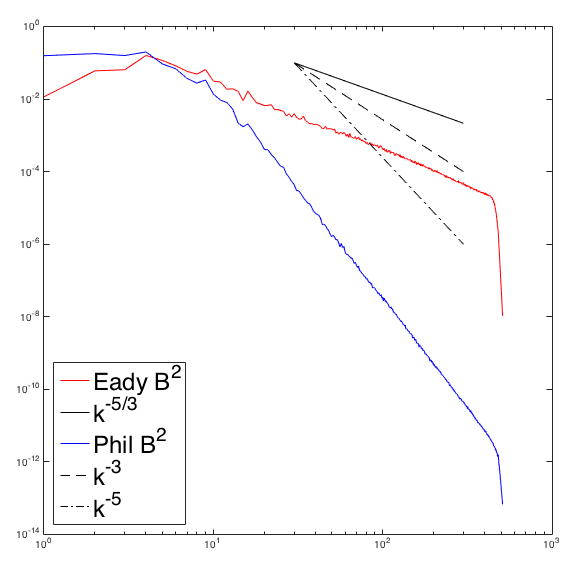

In [27]:
Image(filename='Idealized_Model/Buoyancy_spectra_Shane.png')

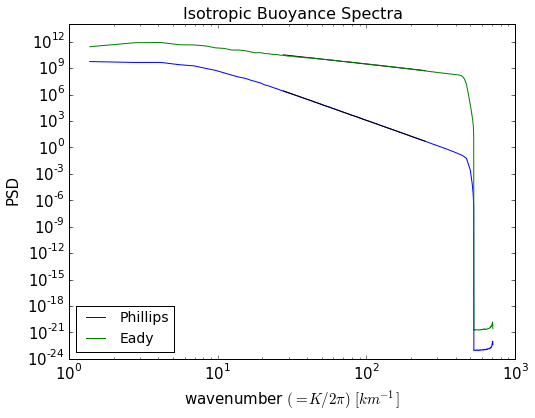

In [51]:
plt.figure(figsize=(8,6))
blue, = plt.loglog(Ki*1e3, isospec_sum_p, basex=10, basey=10)
black = plt.loglog(Ki[Ns:Ne]*1e3, ps_fit_e, 'k')
green, = plt.loglog(Ki*1e3, isospec_sum_e, 'g', basex=10, basey=10)
black = plt.loglog(Ki[Ns:Ne]*1e3, ps_fit_p, 'k')
plt.title('Isotropic Buoyance Spectra', fontsize=16)
plt.xlabel('wavenumber $(=K/2\pi)\ [km^{-1}]$', fontsize=15)
plt.ylabel('PSD', fontsize=15)
plt.ylim([1e-24, 1e14])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend([blue, green], ['Phillips', 'Eady'], loc=3, fontsize=14)

From the QG theories, we were expecting an equipartitioning between the kinetic and potential energies, i.e. for the buoyancy power spectra in our analysis to have slopes somewhat similar to the ones presented in Keating et al. (2011) . The results of our spectral slope are $-1.88$ for Eady and $-6.01$ for Phillips. These values are slightly steeper than the results Shane provided us, which were approximately $-5/3$ for Eady and slightly steeper than $-5$ for Phillips.

# $2^{nd}$ Order Structure Function $(q=2)$ #

$$ \big\langle {\big|b'(x+ n\Delta x) - b'(x)\big|}^q \big\rangle \propto \big| n\Delta x\big|^{H_q} $$
$$ \big\langle {\big|b'(y+ n\Delta y) - b'(y)\big|}^q \big\rangle \propto \big| n\Delta y\big|^{H_q} $$
where the brackets, $ \langle \rangle $ represent a spatiotemperal averaging and $H_q$ is a constant. The variable $n$ represents the grid spacing.
$$ \therefore \hspace{0.2cm} \Sigma_q^x(n) \equiv \frac {\log{ \big( \big \langle {\big|b'(x+ n\Delta x) - b'(x) \big|}^q \big \rangle \big)}}{\log{ | n\Delta x |}} \propto H_q , \hspace{0.5cm}
\Sigma_q^y(n) \equiv \frac {\log{ \big( \big \langle {\big|b'(y+ n\Delta y) - b'(y) \big|}^q \big \rangle \big)}}{\log{ | n\Delta y |}} \propto H_q $$

## Eady Model ##

In [19]:
# load data files
base_dir = '../../../data/scratch/takaya/Shane/Eady/data/'

nday = 25
index = 0
while nday < 65:
    if nday % 5 == 0:
        fname = os.path.join(base_dir, 
                         'b%02d.mat' % (nday))
        print fname
        try:
            p = idealmodel.IDEALFile(fname)
            L_e, Struc_funci, Struc_funcj = p.structure_function()   # Calculates all the variables necessary for the structure function
            N = len(L_e)
            if index == 0:
                Struc_funci_sum = np.zeros(N)
                Struc_funcj_sum = np.zeros(N)
            Struc_funci_sum += Struc_funci
            Struc_funcj_sum += Struc_funcj
            index += 1
        except: 
            if os.path.exists(fname) == False:
                print 'error'
        print index, nday
    nday += 1

Nt_e = index
Struc_funci_e = Struc_funci_sum/Nt_e
Struc_funcj_e = Struc_funcj_sum/Nt_e
Struc_func_e = .5*(Struc_funci_e+Struc_funcj_e)

../../../data/scratch/takaya/Shane/Eady/data/b25.mat
1 25
../../../data/scratch/takaya/Shane/Eady/data/b30.mat
2 30
../../../data/scratch/takaya/Shane/Eady/data/b35.mat
3 35
../../../data/scratch/takaya/Shane/Eady/data/b40.mat
4 40
../../../data/scratch/takaya/Shane/Eady/data/b45.mat
5 45
../../../data/scratch/takaya/Shane/Eady/data/b50.mat
5 50
../../../data/scratch/takaya/Shane/Eady/data/b55.mat
error
5 55
../../../data/scratch/takaya/Shane/Eady/data/b60.mat
6 60


## Fitting a Slope to the Structure Function ##

In [20]:
#dx = 1e3   # [m]
#dy = 1e3
#x = 2**np.arange(N)*dx
#y = 2**np.arange(N)*dy
#X_e = np.log10(x)
#B_e = np.log10(Struc_funci_e)

#A = np.vstack([X_e[2:-2], np.ones(len(X_e[2:-2]))]).T
#m_e, c_e = np.linalg.lstsq(A, B_e[2:-2])[0]
sf_fit_e, sf_slope_e = fit_loglog(L_e, Struc_func_e)

print sf_slope_e  # slope and intercept

0.783454369049


## Phillips Model ##

In [23]:
# load data files
base_dir = '../../../data/scratch/takaya/Shane/Phillips/'

nday = 25
index = 0
while nday < 65:
    if nday % 5 == 0:
        fname = os.path.join(base_dir, 
                         'b%02d.mat' % (nday))
        print fname
        try:
            p = idealmodel.IDEALFile(fname)
            L_p, Struc_funci, Struc_funcj = p.structure_function(varname='bC')   # Calculates all the variables necessary for the structure function
            N = len(L_p)
            if index == 0:
                Struc_funci_sum = np.zeros(N)
                Struc_funcj_sum = np.zeros(N)
            Struc_funci_sum += Struc_funci
            Struc_funcj_sum += Struc_funcj
            index += 1
        except: 
            if os.path.exists(fname) == False:
                print 'error'
        print index, nday
    nday += 1

Nt_p = index
Struc_funci_p = Struc_funci_sum/Nt_p
Struc_funcj_p = Struc_funcj_sum/Nt_p
Struc_func_p = .5*(Struc_funci_p+Struc_funcj_p)

../../../data/scratch/takaya/Shane/Phillips/b25.mat
1 25
../../../data/scratch/takaya/Shane/Phillips/b30.mat
2 30
../../../data/scratch/takaya/Shane/Phillips/b35.mat
3 35
../../../data/scratch/takaya/Shane/Phillips/b40.mat
4 40
../../../data/scratch/takaya/Shane/Phillips/b45.mat
5 45
../../../data/scratch/takaya/Shane/Phillips/b50.mat
6 50
../../../data/scratch/takaya/Shane/Phillips/b55.mat
7 55
../../../data/scratch/takaya/Shane/Phillips/b60.mat
8 60


In [24]:
#x = 2**np.arange(N)*dx
#y = 2**np.arange(N)*dy
#X_p = np.log10(x)
#B_p = np.log10(Struc_funci_p)

#A = np.vstack([X_p[2:-2], np.ones(len(X_p[2:-2]))]).T
#m_p, c_p = np.linalg.lstsq(A, B_p[2:-2])[0]

sf_fit_p, sf_slope_p = fit_loglog(L_p, Struc_func_p)

print sf_slope_p  # slope and intercept

1.58381301599


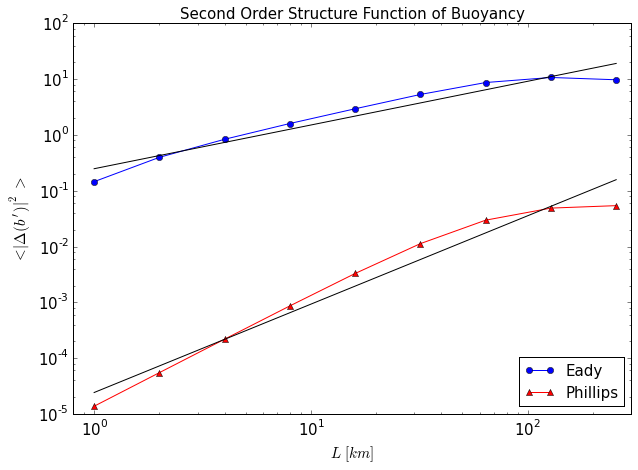

In [25]:
dx = 1
dy = 1
x = 2**np.arange(N)*dx
y = x.copy()
#y = 2**np.arange(N)*dy

plt.figure(figsize=(10,7))
blue, = plt.loglog(y, Struc_func_e, 'bo-', basex=10, basey=10)
#magenta, = plt.loglog(x, Struc_funci_e, 'm*-', basex=10, basey=10)
#green, = plt.loglog(y, Struc_funcj_p, 'g*-', basex=10, basey=10)
red, = plt.loglog(x, Struc_func_p, 'r^-', basex=10, basey=10) 
#black, = plt.loglog(10**X[2:-2], ((10**X[2:-2])**m_e)*1e3, 'k', basex=10, basey=10)
#black, = plt.loglog(10**X[2:-2], ((10**X[2:-2])**m_p)*1e-4, 'k', basex=10, basey=10)
black, = plt.loglog(x, sf_fit_e, 'k')
black, = plt.loglog(x, sf_fit_p, 'k')
plt.title('Second Order Structure Function of Buoyancy', fontsize=15)
plt.xlabel('$L \  [km]$', fontsize=15)
plt.ylabel('$< {| \Delta ({b}^{\ \prime}) |}^2 >$', fontsize=15)
plt.xlim([8e-1, 3e2])
plt.ylim([1e-5, 1e2])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend([blue, red], ['Eady', 'Phillips'], loc=4, fontsize=15)

The second order structure function analysis shows that they have a slope around $0.78$ for Eady and $1.58$ for Phillips. The slope of the spectra ($\lambda$) and the slope of the second order structure function ($\gamma$) have a relationship as:
$$ \gamma = -\lambda-1 $$
Remembering that the spectral slopes were $-1.81$ for Eady and $-6.00$ for Phillips, Eady seems to satisfy the slope relation between spectra and structure function but the structure-function slope for Phillips is too shallow...

## Proof of the Slope Relationship (McCaffrey et al. (201X)) ##

The buoyancy autocorrelation function $ R(s)$ and $2^{nd}$-order structure function $D_2(s)$ for spatial separation, $s$ are defined by:
$$ R(s) = \overline{b'(x)b'(x+s)}\ \ \ \ (1) $$
$$ D_2(s) = \overline{{\big(b'(x)-b'(x+s)\big)}^2}\ \ \ \ (2) $$
where the overbars represent an averaging. The second-order structure function which will most often be calculated here, has the unique relationship to $R(s)$ by:
$$ D_2(s) = 2\big(\overline{{b'}^2}-R(s)\big)\ \ \ \ (3) $$
Now, the isotropic buoyancy variance spectrum, $B(k)$ can be written as:
$$ \overline{{b'}^2}=\int_0^\infty{B(k)\ dk}\ \ \ \ (4) $$
and the autocorrelation may be represented spectrally for isotropic, homogenous turbulence by
$$ R(s) = \int_0^\infty{B(k)\cos(ks)\ dk}\ \ \ \ (5) $$
Using the relationship between the autocorrelation and structure function, equation (3) and equation (5), we get:
$$ D_2(s) = 2\int_0^\infty{B(k)\big(1-\cos(ks)\big)\ dk}\ \ \ \ (6) $$
For a given spectrum, $B(k)=\alpha k^\lambda$ we have:
$$ D_2(s) = 2\int_0^\infty{\alpha k^\lambda\cos(ks)\ dk}=2\alpha s^{-\lambda-1}\int_0^\infty{\xi^{\lambda}(1-\cos(\xi)\ d\xi} $$
where we have changed the variable ($ks\to\xi$, $dk = \frac{d\xi}{s}$).
$$\therefore D_2(s) = s^{-\lambda-1}\Big[ 2\alpha \int_0^\infty{\xi^{\lambda}(1-\cos(\xi)\ d\xi} \Big] \propto s^{\gamma} $$